

# DAT 301 Project 2
##Alena and Josie
---



In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


## Data Overview
This is a set of data with the nutrition facts and marketing of different cereals in the US.

There are 11 columns:

- mfr = Manufacturer
- calories
- protein
- fat
- sodium
- fibre
- carbo = Carbohydrates
- sugars
- shelf = counting from the floor which display shelf it is on
- potassium
- vitamins


## Objective
Our objective is to compare the relationship between nutritional categories of different cereal brands in the US and attempt to determine the categories have a relationship between the two .

- Fat vs. Protein
- Carbohydrates vs. Sugars
- Sugars vs. Protein
- Fat vs. Calories
- Calories vs. Sodium
- Carbohydrates vs. Calories
- Protein vs. Calories
- Sugar vs. Calories
- Fat vs. Carbohydrates

## Cleaning the Data
First, we imported the data and checked for any missing data values and there are no missing data values, so we can continue to clean up our data. Then viewed summary and  see that the manufacturer and vitamins are represented by characters.

In [ ]:
## Create an Data Frame and import data
df = pd.read_csv('/content/UScereal.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rownames   65 non-null     object 
 1   mfr        65 non-null     object 
 2   calories   65 non-null     float64
 3   protein    65 non-null     float64
 4   fat        65 non-null     float64
 5   sodium     65 non-null     float64
 6   fibre      65 non-null     float64
 7   carbo      65 non-null     float64
 8   sugars     65 non-null     float64
 9   shelf      65 non-null     int64  
 10  potassium  65 non-null     float64
 11  vitamins   65 non-null     object 
dtypes: float64(8), int64(1), object(3)
memory usage: 6.2+ KB
None


We want to convert the vitamins data into columns with binary that identify whether or not the cereal includes the specific vitamin, so we can use the vitamin data in a numerical way.

In [ ]:
df['enriched'] = df['vitamins'].apply(lambda x: 1 if x == 'enriched' else 0)
df['100%'] = df['vitamins'].apply(lambda x: 1 if x == '100%' else 0)
df['none'] = df['vitamins'].apply(lambda x: 1 if x == 'none' else 0)

Now we want to convert the manufacturer data into columns with binary numbers that identify whether or not the cereal is the the specific brand, so we can use the manufacturer data in a numerical way.

In [ ]:
df['General Mills'] = df['mfr'].apply(lambda x: 1 if x == 'G' else 0)
df['Kelloggs'] = df['mfr'].apply(lambda x: 1 if x == 'K' else 0)
df['Nabisco'] = df['mfr'].apply(lambda x: 1 if x == 'N' else 0)
df['Post'] = df['mfr'].apply(lambda x: 1 if x == 'P' else 0)
df['Quaker Oats'] = df['mfr'].apply(lambda x: 1 if x == 'Q' else 0)
df['Ralston Purina'] = df['mfr'].apply(lambda x: 1 if x == 'R' else 0)

In [ ]:
df.drop('vitamins', axis=1, inplace=True)

In [ ]:

print(df)

                     rownames mfr   calories    protein       fat     sodium  \
0                   100% Bran   N  212.12121  12.121212  3.030303  393.93939   
1                    All-Bran   K  212.12121  12.121212  3.030303  787.87879   
2   All-Bran with Extra Fiber   K  100.00000   8.000000  0.000000  280.00000   
3     Apple Cinnamon Cheerios   G  146.66667   2.666667  2.666667  240.00000   
4                 Apple Jacks   K  110.00000   2.000000  0.000000  125.00000   
..                        ...  ..        ...        ...       ...        ...   
60                    Triples   G  146.66667   2.666667  1.333333  333.33333   
61                       Trix   G  110.00000   1.000000  1.000000  140.00000   
62                 Wheat Chex   R  149.25373   4.477612  1.492537  343.28358   
63                   Wheaties   G  100.00000   3.000000  1.000000  200.00000   
64        Wheaties Honey Gold   G  146.66667   2.666667  1.333333  266.66667   

        fibre     carbo     sugars  she

## Analyzing The Data
First we generated bar graphs comparing different nutritional components by brand.

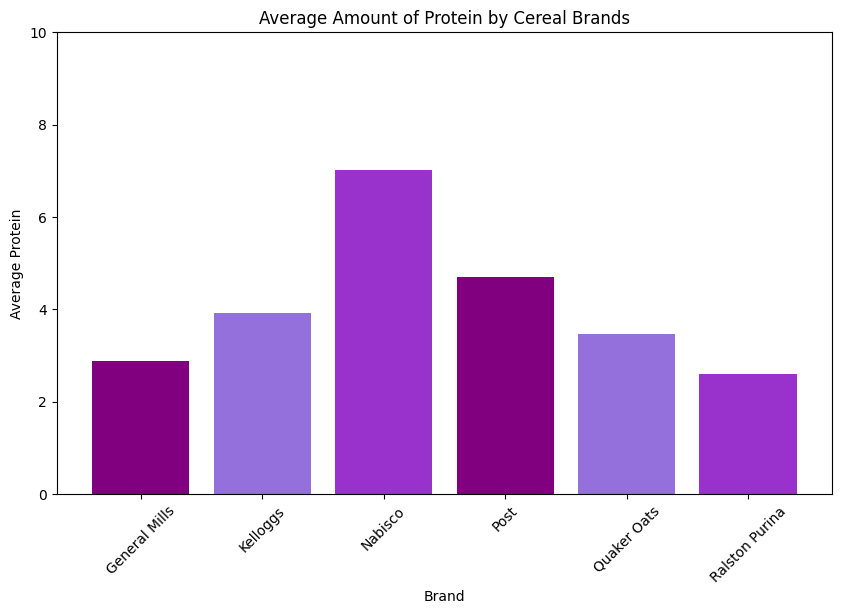

In [ ]:
brands = ["General Mills", "Kelloggs", "Nabisco", "Post", "Quaker Oats", "Ralston Purina"]
brand_protein = [df.loc[df[brand] == 1, 'protein'].mean() for brand in brands]
plt.figure(figsize=(10, 6))
plt.bar(brands, brand_protein, color=['purple', 'mediumpurple', 'darkorchid'])
plt.title("Average Amount of Protein by Cereal Brands")
plt.xlabel("Brand")
plt.ylabel("Average Protein")
plt.ylim(0, 10)
plt.xticks(rotation=45)
plt.show()


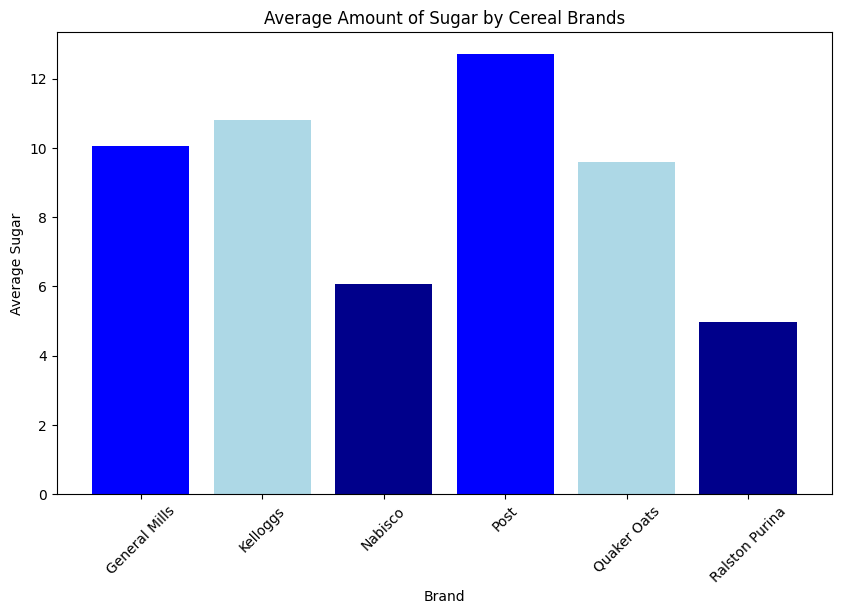

In [ ]:
brands = ["General Mills", "Kelloggs", "Nabisco", "Post", "Quaker Oats", "Ralston Purina"]
brand_sugars = [df.loc[df[brand] == 1, 'sugars'].mean() for brand in brands]
plt.figure(figsize=(10, 6))
plt.bar(brands, brand_sugars, color=['blue', 'lightblue', 'darkblue'])
plt.title("Average Amount of Sugar by Cereal Brands")
plt.xlabel("Brand")
plt.ylabel("Average Sugar")

plt.xticks(rotation=45)
plt.show()

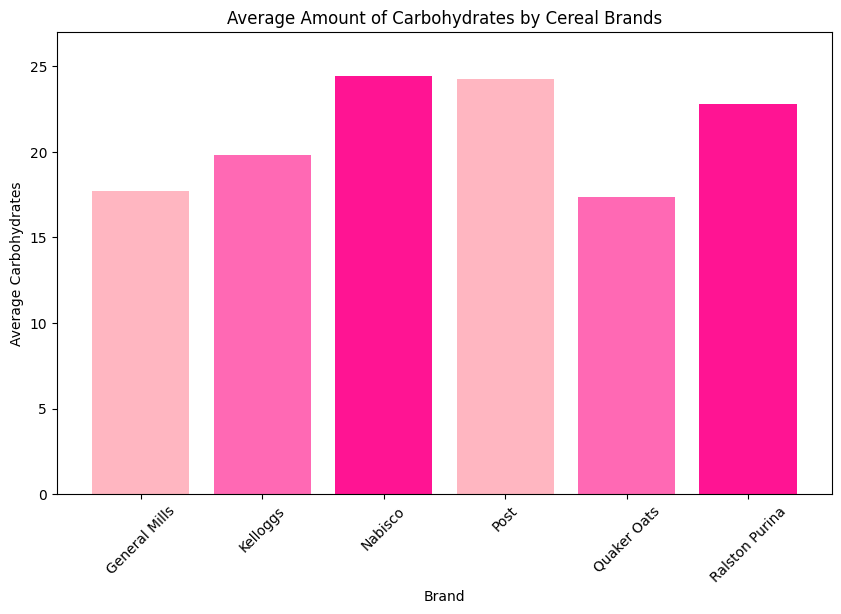

In [ ]:
brands = ["General Mills", "Kelloggs", "Nabisco", "Post", "Quaker Oats", "Ralston Purina"]
brand_protein = [df.loc[df[brand] == 1, 'carbo'].mean() for brand in brands]
plt.figure(figsize=(10, 6))
plt.bar(brands, brand_protein, color=['lightpink', 'hotpink', 'deeppink'])
plt.title("Average Amount of Carbohydrates by Cereal Brands")
plt.xlabel("Brand")
plt.ylabel("Average Carbohydrates")
plt.ylim(0, 27)
plt.xticks(rotation=45)
plt.show()

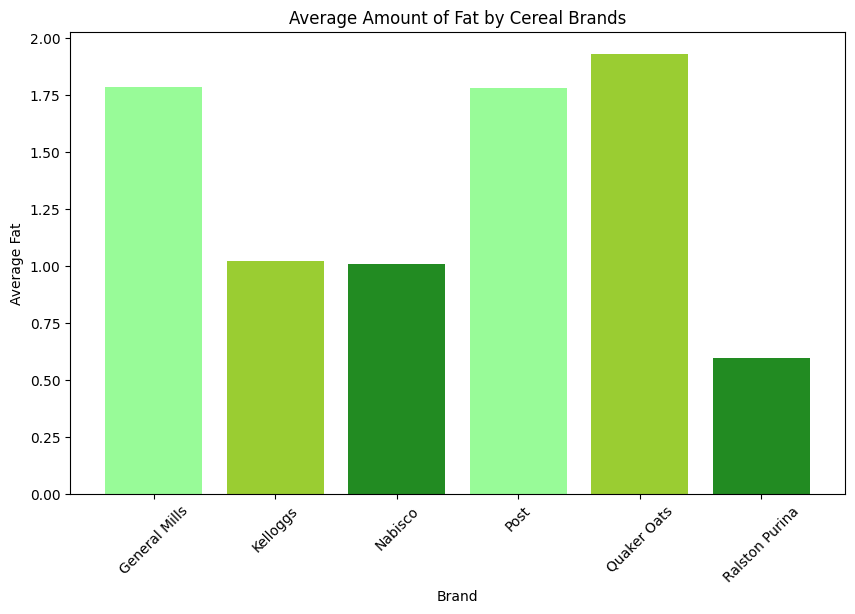

In [ ]:
brands = ["General Mills", "Kelloggs", "Nabisco", "Post", "Quaker Oats", "Ralston Purina"]
brand_fat = [df.loc[df[brand] == 1, 'fat'].mean() for brand in brands]
plt.figure(figsize=(10, 6))
plt.bar(brands, brand_fat, color=['palegreen', 'yellowgreen', 'forestgreen'])
plt.title("Average Amount of Fat by Cereal Brands")
plt.xlabel("Brand")
plt.ylabel("Average Fat")
plt.xticks(rotation=45)
plt.show()

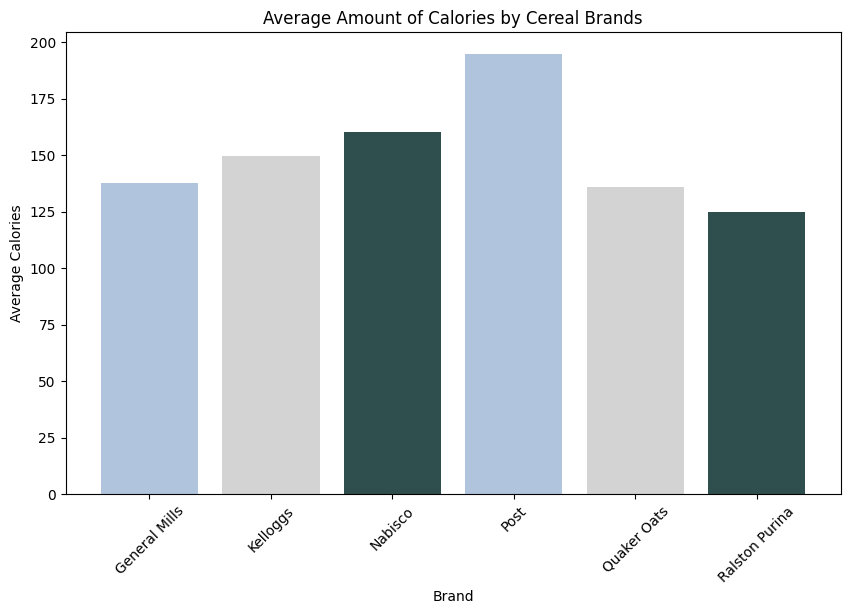

In [ ]:
brands = ["General Mills", "Kelloggs", "Nabisco", "Post", "Quaker Oats", "Ralston Purina"]
brand_calories = [df.loc[df[brand] == 1, 'calories'].mean() for brand in brands]
plt.figure(figsize=(10, 6))
plt.bar(brands, brand_calories, color=['lightsteelblue', 'lightgray', 'darkslategray'])
plt.title("Average Amount of Calories by Cereal Brands")
plt.xlabel("Brand")
plt.ylabel("Average Calories")
plt.xticks(rotation=45)
plt.show()

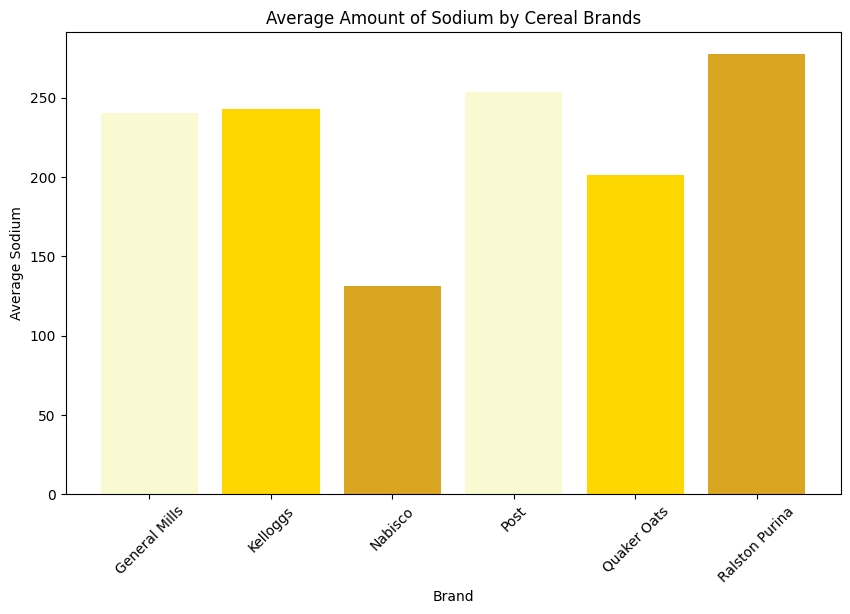

In [ ]:
brands = ["General Mills", "Kelloggs", "Nabisco", "Post", "Quaker Oats", "Ralston Purina"]
brand_calories = [df.loc[df[brand] == 1, 'sodium'].mean() for brand in brands]
plt.figure(figsize=(10, 6))
plt.bar(brands, brand_calories, color=['lightgoldenrodyellow', 'gold', 'goldenrod'])
plt.title("Average Amount of Sodium by Cereal Brands")
plt.xlabel("Brand")
plt.ylabel("Average Sodium")
plt.xticks(rotation=45)
plt.show()

We compared the different graphs looking for any relationships between two nutritional components. Then we plotted the two components on a scatter plot and used linear regression and correlation to determine if a relationship actually exists between them.

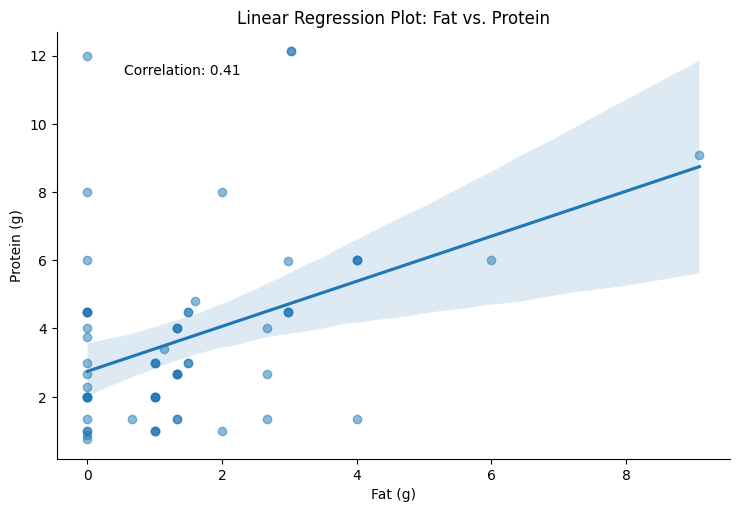

In [ ]:
data = df[['fat', 'protein']]
sns.lmplot(x='fat', y='protein', data=data, aspect=1.5, scatter_kws={'alpha':0.5})
correlation_coefficient = data.corr().iloc[0, 1]
plt.text(0.1, 0.9, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Fat (g)')
plt.ylabel('Protein (g)')
plt.title('Linear Regression Plot: Fat vs. Protein')
plt.show()

The relationshiop between Fat and Protien has a correlation of 0.41 meaning they have a positve linear relationship. So, the more Fat the more protien. Though the correlation is 0.41 so it is moderate, meaning there is not very strong evidence these two categories have a relationship.


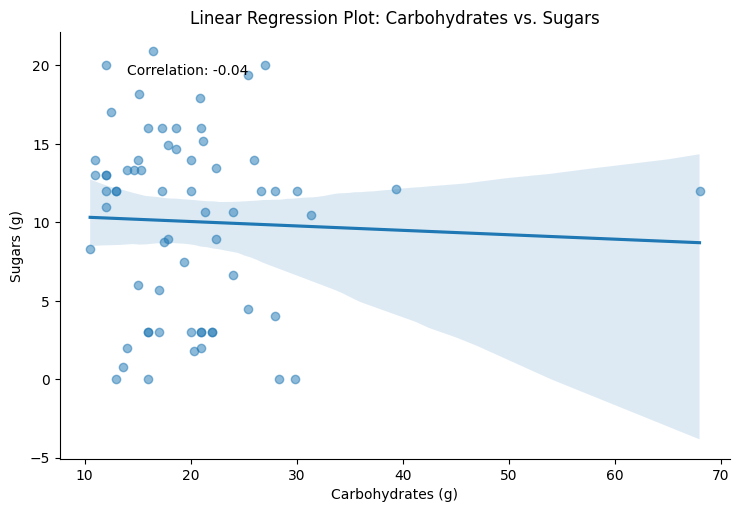

In [ ]:
data = df[['carbo', 'sugars']]
sns.lmplot(x='carbo', y='sugars', data=data, aspect=1.5, scatter_kws={'alpha':0.5})
correlation_coefficient = data.corr().iloc[0, 1]
plt.text(0.1, 0.9, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Carbohydrates (g)')
plt.ylabel('Sugars (g)')
plt.title('Linear Regression Plot: Carbohydrates vs. Sugars')
plt.show()

The relationshiop between Carbs and Sugars has a correlation of -0.04 meaning they have a negative linear relationship. So, the more Sugar the less carbs. Though the correlation is -0.04 so it is very weak, meaning there is no evidence these two categories have a relationship. Meaning the amount of carbs does not effect the amount of sugar anc vice versa.

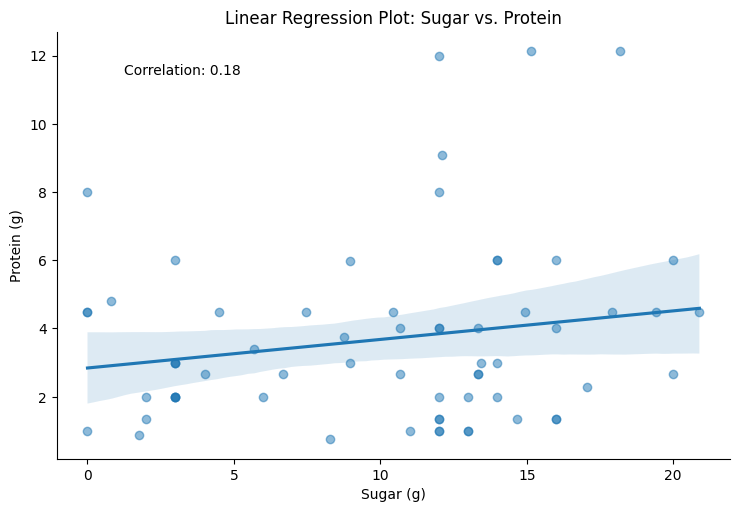

In [ ]:
data = df[['sugars', 'protein']]
sns.lmplot(x='sugars', y='protein', data=data, aspect=1.5, scatter_kws={'alpha':0.5})
correlation_coefficient = data.corr().iloc[0, 1]
plt.text(0.1, 0.9, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Sugar (g)')
plt.ylabel('Protein (g)')
plt.title('Linear Regression Plot: Sugar vs. Protein')
plt.show()

Sugar and protein have a correlation of 0.18 which means there is a very weak relationship between the two, meaning there is little to no connection between the two.

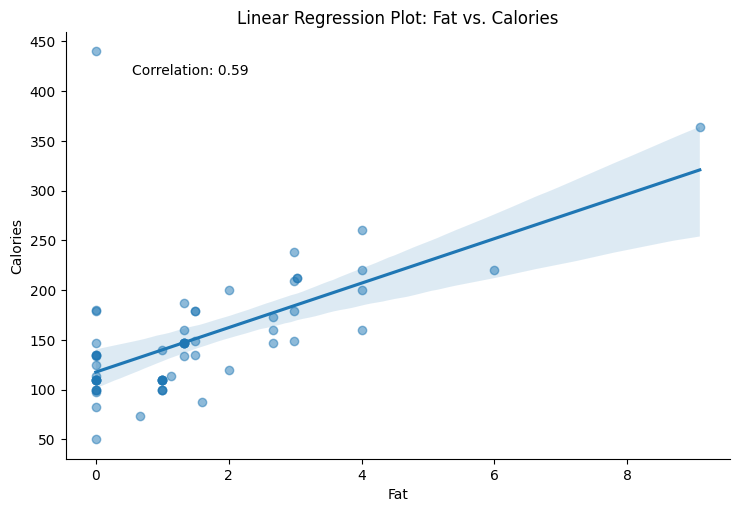

In [ ]:
data = df[['fat', 'calories']]
sns.lmplot(x='fat', y='calories', data=data, aspect=1.5, scatter_kws={'alpha':0.5})
correlation_coefficient = data.corr().iloc[0, 1]
plt.text(0.1, 0.9, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Fat')
plt.ylabel('Calories')
plt.title('Linear Regression Plot: Fat vs. Calories')
plt.show()

Fat and calories have a correlation of 0.59 meaning there is moderate evidence of a relationship between the two. The positive correlation tells us that when higher levels of fat are observed so too will higher levels of calories be observed.

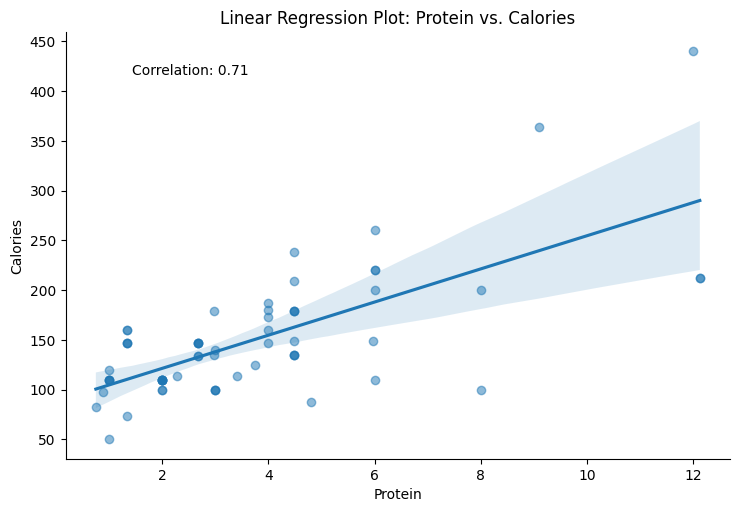

In [ ]:
data = df[['protein', 'calories']]
sns.lmplot(x='protein', y='calories', data=data, aspect=1.5, scatter_kws={'alpha':0.5})
correlation_coefficient = data.corr().iloc[0, 1]
plt.text(0.1, 0.9, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Protein')
plt.ylabel('Calories')
plt.title('Linear Regression Plot: Protein vs. Calories')
plt.show()

The relationshiop between Protien and Calories has a correlation of 0.71 meaning they have a positve linear relationship. So, the more Protien the more Calories. The correlation of 0.71  is strong, meaning there is strong evidence these two categories have a relationship. That means if there is more protien we can assume there is more calories and vice versa.

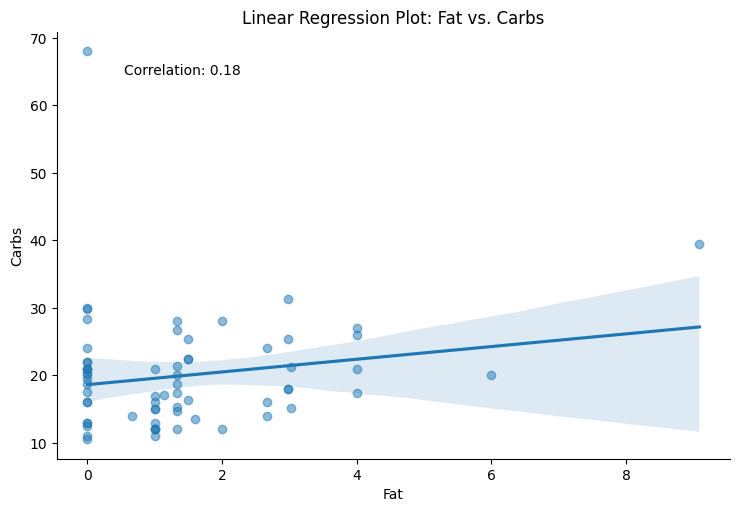

In [ ]:
data = df[['fat', 'carbo']]
sns.lmplot(x='fat', y='carbo', data=data, aspect=1.5, scatter_kws={'alpha':0.5})
correlation_coefficient = data.corr().iloc[0, 1]
plt.text(0.1, 0.9, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Fat')
plt.ylabel('Carbs')
plt.title('Linear Regression Plot: Fat vs. Carbs')
plt.show()

The relationshiop between Fat and Carbs has a correlation of 0.18 meaning they have a positve linear relationship. The correlation of 0.18 is very weak, meaning there is no evidence these two categories have a relationship.

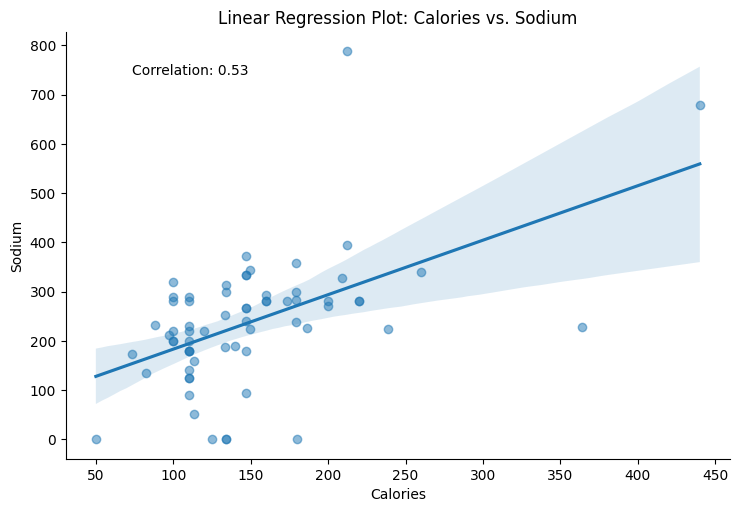

In [ ]:
data = df[['calories', 'sodium']]
sns.lmplot(x='calories', y='sodium', data=data, aspect=1.5, scatter_kws={'alpha':0.5})
correlation_coefficient = data.corr().iloc[0, 1]
plt.text(0.1, 0.9, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Calories')
plt.ylabel('Sodium')
plt.title('Linear Regression Plot: Calories vs. Sodium')
plt.show()


The relationshiop between Sodium and Calories has a correlation of 0.53 meaning they have a positve linear relationship. So, the more Sodium the more Calories. The correlation of 0.53  is moderate, meaning there is not strong evidence these two categories have a relationship, but it is not zero evidence.

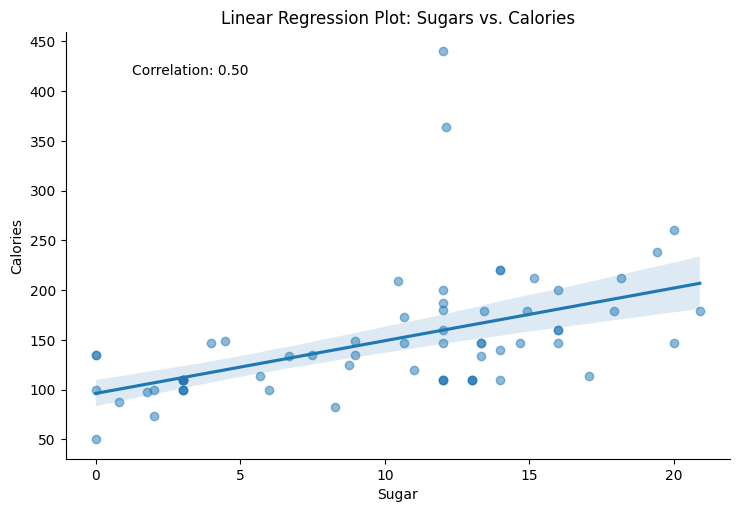

In [ ]:
data = df[['sugars', 'calories']]
sns.lmplot(x='sugars', y='calories', data=data, aspect=1.5, scatter_kws={'alpha':0.5})
correlation_coefficient = data.corr().iloc[0, 1]
plt.text(0.1, 0.9, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Sugar')
plt.ylabel('Calories')
plt.title('Linear Regression Plot: Sugars vs. Calories')
plt.show()

The relationshiop between Sugars and Calories has a correlation of 0.50 meaning they have a positve linear relationship. So, the more Sugars the more Calories. The correlation of 0.50  is moderate, meaning there is not strong evidence these two categories have a relationship.

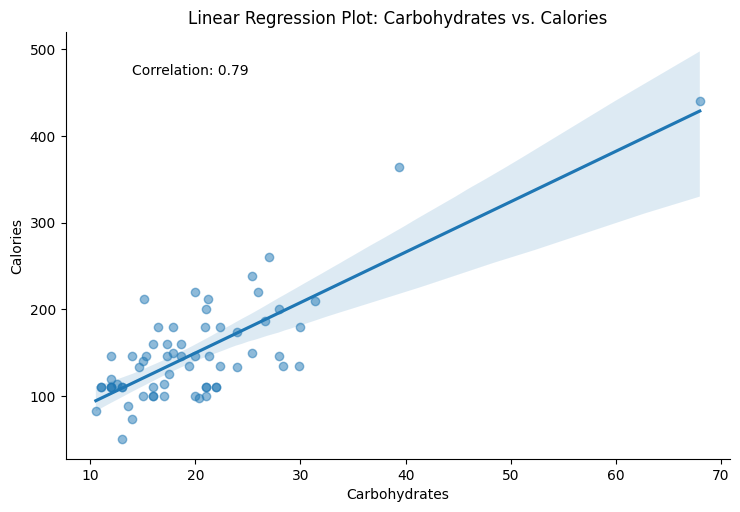

In [ ]:
data = df[['carbo', 'calories']]
sns.lmplot(x='carbo', y='calories', data=data, aspect=1.5, scatter_kws={'alpha':0.5})
correlation_coefficient = data.corr().iloc[0, 1]
plt.text(0.1, 0.9, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)
plt.xlabel('Carbohydrates')
plt.ylabel('Calories')
plt.title('Linear Regression Plot: Carbohydrates vs. Calories')
plt.show()


The relationshiop between Carbs and Calories has a correlation of 0.79 meaning they have a positve linear relationship. So, the more Carbs the more Calories. The correlation of 0.79  is strong, meaning there is strong evidence these two categories have a relationship. That means if there is more carbs we can assume there is more calories and vice versa.

## Our Final Findings
After comparing many different nutritional components in search of statistical relationship we found:

- The amount of carbohydrates in a cereal is strongly correlated to the number of calories in that cereal
- The amount of protein is strongly correlated to the amount of calories in the cereal
- The amount of fat in the cereal has a moderate correlation to the amount of calories in the cereal
- The amount of fat in the cereal has a moderate correlation to the amount of protein in the cereal
- The amount of sugars found in a cereal has a moderate correlation to the number of calories in that cereal
- The amount of calories found in a cereal has a moderate correlation to the amount of sodium found in the cereal
- The amount carbohydrates has a very weak correlation to the amount of sugar in the cereal
- The amount sugar in the cereal has a very weak correlation to the amount of protein in the cereal
- The amount of fat in the cereal has a very weak correlation to the amount of carbohydrates in the cereal